In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [17]:
file = open("IR-assignment-2-data.txt",'r')

count_url = 0
rel_dict = {}
url_list = []
rel_75 = []
total_rel = 0
for line in file.readlines():
    tokens = line.split(" ")
    if tokens[1] == 'qid:4':
        count_url = count_url + 1
        rel_dict[count_url] = tokens[0]
        url_list.append((tokens[0],line))
        feature_75 = tokens[76].split(":")[1]
        rel_75.append([tokens[0],float(feature_75)])
        if tokens[0]>'0':
            total_rel = total_rel + 1

In [10]:
def get_count_files(pair_list):
    rel_0 = 0
    rel_1 = 0
    rel_2 = 0
    rel_3 = 0
    rel_4 = 0
    for i in pair_list:
        if i[0] == '0':
            rel_0 = rel_0 + 1
        elif i[0] == '1':
            rel_1 = rel_1 + 1
        elif i[0] == '2':
            rel_2 = rel_2 + 1
        elif i[0] == '3':
            rel_3 = rel_3 + 1
        elif i[0] == '4':
            rel_4 = rel_4 + 1
    return math.factorial(rel_0)*math.factorial(rel_1)*math.factorial(rel_2)*math.factorial(rel_3)*math.factorial(rel_4)

def arrange_max_dcg(pair_list):
    sorted_list = sorted(pair_list, key=lambda x:(x[0], x[1]), reverse=True)
    file = open("output.txt","w")
    for i in sorted_list:
        file.write(i[1])
    file.close()
    return get_count_files(pair_list)
        
print("Number of files that can be created are: ")
print(arrange_max_dcg(url_list))

Number of files that can be created are: 
19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [11]:
def dcg_1(relevance_dict):
    ans = 0
    for i in range(1,len(relevance_dict)+1):
        ans = ans + (float(relevance_dict[i])/math.log2(i+1))
    return ans

def dcg_2(relevance_dict):
    ans = 0
    for i in range(1,len(relevance_dict)+1):
        ans = ans + ((pow(2,float(relevance_dict[i]))-1)/math.log2(i+1))
    return ans

def ndcg_1(relevance_dict, sorted_dict):
    dcg = dcg_1(relevance_dict)
    idcg = dcg_1(sorted_dict)
    return dcg/idcg

def ndcg_2(relevance_dict, sorted_dict):
    dcg = dcg_2(relevance_dict)
    idcg = dcg_2(sorted_dict)
    return dcg/idcg

sorted_dict = {}
sorted_list = sorted(rel_dict.items(), key=lambda x:x[1], reverse=True)
for i in range(len(sorted_list)):
    sorted_dict[i+1] = sorted_list[i][1]
print("nDCG")
print("For entire document: ", ndcg_1(rel_dict, sorted_dict))

sorted_dict_50 = {}
rel_dict_50 = {}
for i in range(50):
    sorted_dict_50[i+1] = sorted_list[i][1]
for i in range(1,51):
    rel_dict_50[i] = rel_dict[i]
print("At position 50: ", ndcg_1(rel_dict_50, sorted_dict_50))

print("\nnDCG using another formula")
print("For entire document: ", ndcg_2(rel_dict, sorted_dict))
print("At position 50: ", ndcg_2(rel_dict_50, sorted_dict_50))

nDCG
For entire document:  0.6357153091990775
At position 50:  0.37071213897397365

nDCG using another formula
For entire document:  0.5784691984582591
At position 50:  0.35612494416255847


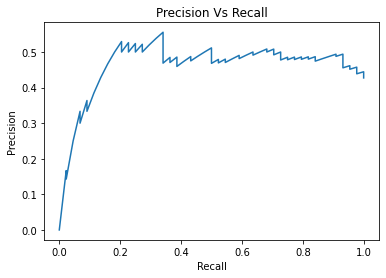

In [20]:
precision = []
recall = []
cum = 0
counter = 0

sorted_rel_75 = sorted(rel_75, key=lambda x:x[1], reverse=True)
for tup in sorted_rel_75:
    counter= counter+1
    recall.append(cum/total_rel)
    precision.append(cum/counter)
    if tup[0]>'0':
        cum = cum+1
        
plt.plot(recall, precision)
plt.title('Precision Vs Recall')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()